<a href="https://colab.research.google.com/github/balabose001/ML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("/content/WineQT.csv")
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [19]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
y_pred


array([ 942, 1423,    3,  194, 1112,  888,  185,  469, 1595,  244,  741,
        951,  756,  351,  919, 1067, 1565,  639,  523,  127,  538,  514,
       1544, 1173, 1546, 1434,  639,  469,  912,  182,  744, 1289, 1027,
        858,  565,  904,  695,  469,  410, 1117, 1523,  355,  402,  336,
        891,  548,  355, 1070,  436, 1237,  194,  557,  155,  944,  499,
        475,  446, 1306,  741,  964,  707,  335, 1468,   76,  200,  456,
        355, 1370, 1257, 1024,  124,  633, 1120, 1056,  113,  985,  347,
       1067,  981,  372,  335,  936,  949, 1041,  170,  162,  831,  541,
       1393,  754, 1552,  944,  447,  533,  440,  300,  533, 1144,  415,
         86,  170,  216, 1459,  985,  294,  717,  231,  376,  359,  170,
        678,  467,  285, 1459,  942,  857,  159,  162,   86,  928,  533,
       1138, 1434, 1175, 1021,  754, 1590, 1052, 1382,  951, 1459,  821,
         16,  319,  498,  324,  409, 1254,  978,  842, 1443, 1300, 1021,
        440,  300,  634, 1264,  429,  336,  744,  7

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


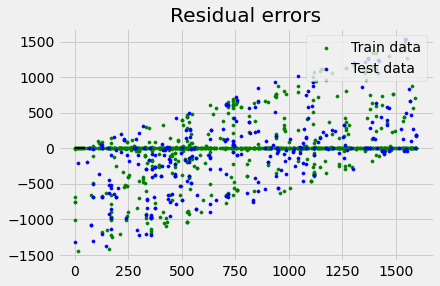

In [24]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(classifier.predict(X_train), classifier.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(classifier.predict(X_test), classifier.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()